## Moving Averages and Their Applications in Data Filtering

### Introduction

Moving averages are a popular and widely-used method for smoothing out short-term fluctuations in data and highlighting longer-term trends. In this notebook, we will explore different types of moving averages, their applications in financial markets, and how they can be used to make better decisions.

We will cover the following topics:
1. **Simple Moving Average (SMA)**
2. **Exponential Moving Average (EMA)**
3. **Weighted Moving Average (WMA)**
4. **Applications in Financial Markets**
5. **Comparative Analysis**
6. **Signal Processing**
7. **Backtesting**



### Step 1: Importing Libraries
Import the necessary libraries for data analysis and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import ipywidgets as widgets
from IPython.display import display, clear_output

### 2. Simple Moving Average (SMA)
The next step will be incorporating the SMA and fetching stock data for visualization.

A Simple Moving Average (SMA) is a statistical measure used in financial analysis to smooth out price data by creating a constantly updated average price. It is calculated by adding the prices (such as closing prices) of an asset over a specific number of periods and then dividing by the number of periods. This helps to identify trends by filtering out short-term fluctuations and highlighting longer-term movements. The formula for SMA is:

SMA = frac{\sum_{i=1}^{n} P_i}{n} 

where P_i represents the price at each period i and n is the number of periods considered.

[*********************100%%**********************]  1 of 1 completed


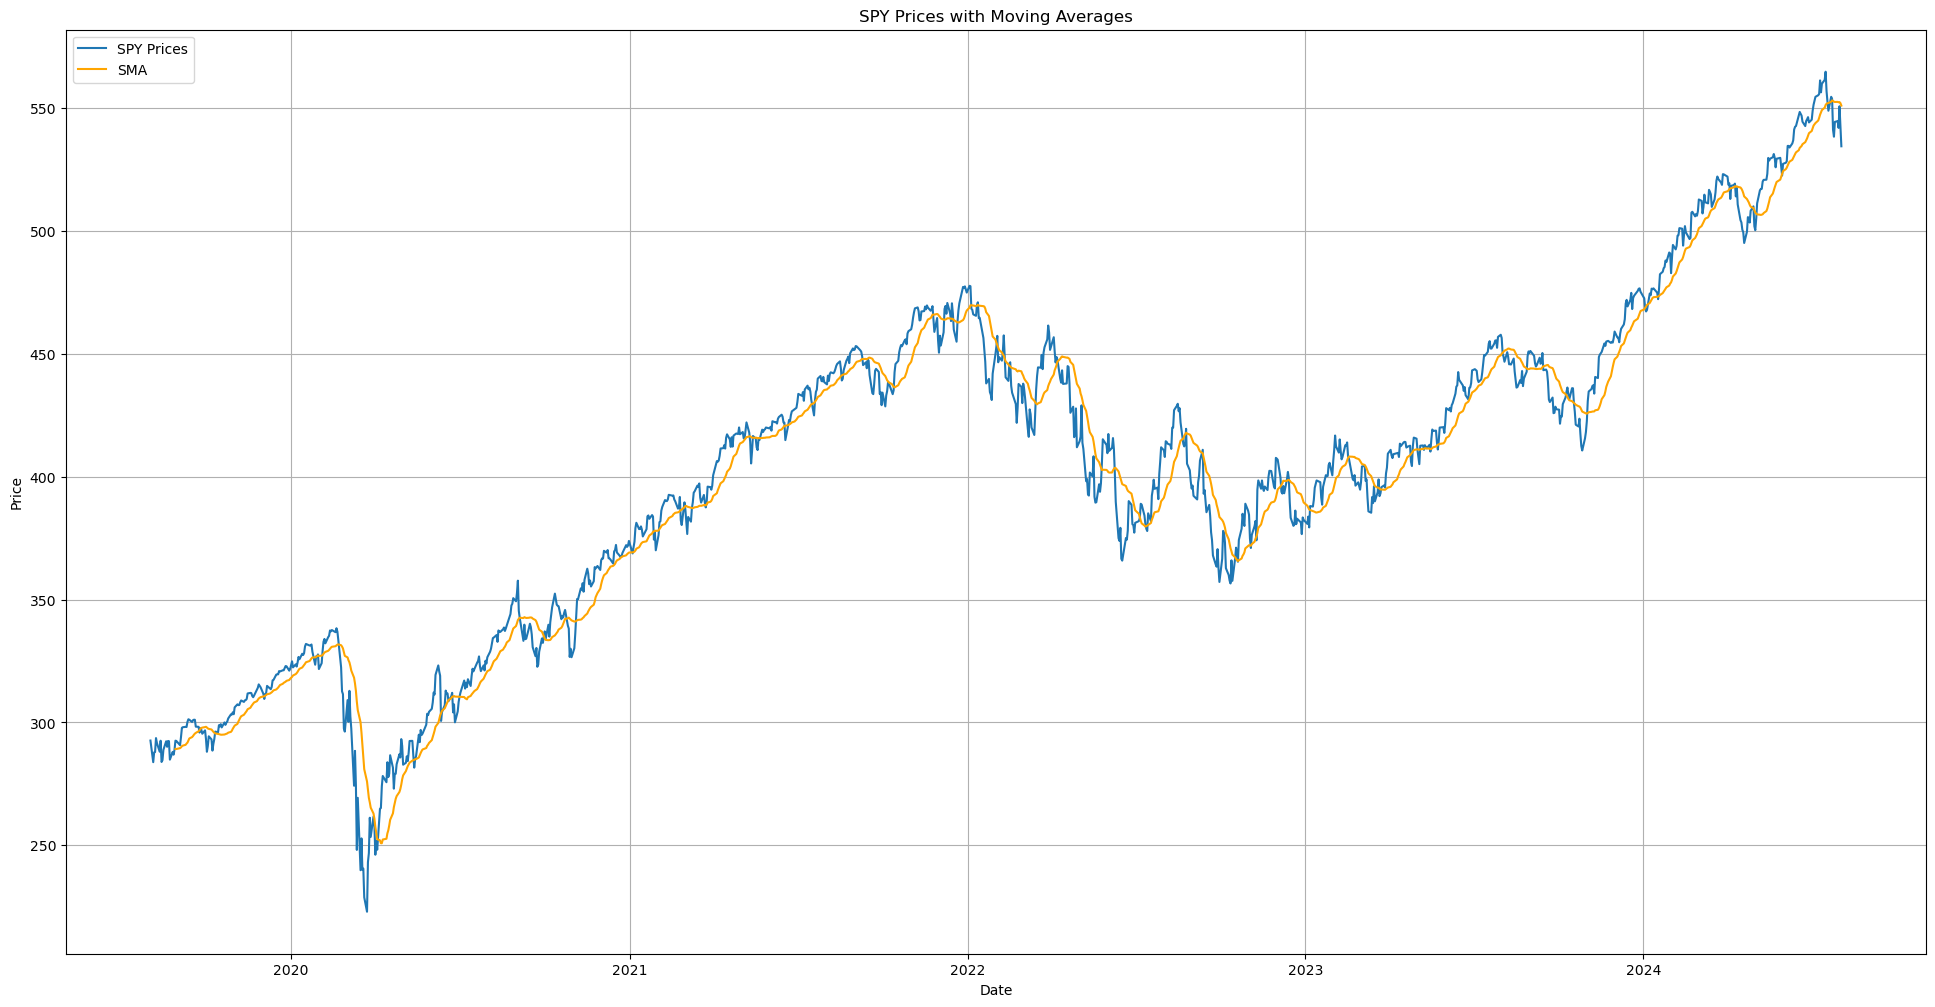

In [2]:
# Modular function to fetch stock data
def fetch_data(ticker, period='5y'):
    data = yf.download(ticker, period=period)
    return data['Close']

# Modular function to plot moving averages
def plot_moving_averages(prices, sma, ema, wma, ticker):
    plt.figure(figsize=(24,12))
    plt.plot(prices.index, prices, label=f'{ticker} Prices', alpha=1)
    if sma is not None:
        plt.plot(sma.index, sma, label='SMA', color='orange')
    if ema is not None:
        plt.plot(ema.index, ema, label='EMA', color='green')
    if wma is not None:
        plt.plot(wma.index, wma, label='WMA', color='red')
    plt.title(f'{ticker} Prices with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Fetching the historical data for SPY as an example
ticker = 'SPY'
prices = fetch_data(ticker)

# Simple Moving Average (SMA)
window_size = 20
sma = prices.rolling(window=window_size).mean()

plot_moving_averages(prices, sma, None, None, ticker)

### 3. Exponential Moving Average
The Exponential Moving Average (EMA) is a type of moving average that gives more weight to recent prices, making it more responsive to new information compared to the Simple Moving Average (SMA). This responsiveness is achieved by applying a multiplier to the most recent price data points.

The formula for calculating the EMA is:

EMA_t = frac{P_t - EMA_{t-1}}{k+1} + EMA_{t-1}

where:
- EMA_t is the EMA at time period t
- P_t is the price at time period t
- EMA_{t-1} is the EMA of the previous period
- k is the smoothing factor, calculated as k = n - 1, where n is the number of periods

The smoothing factor alpha is often expressed as:

alpha = frac{2}{n + 1}

This formula ensures that the EMA reacts more significantly to recent price changes, making it a useful tool for identifying short-term trends in financial markets.

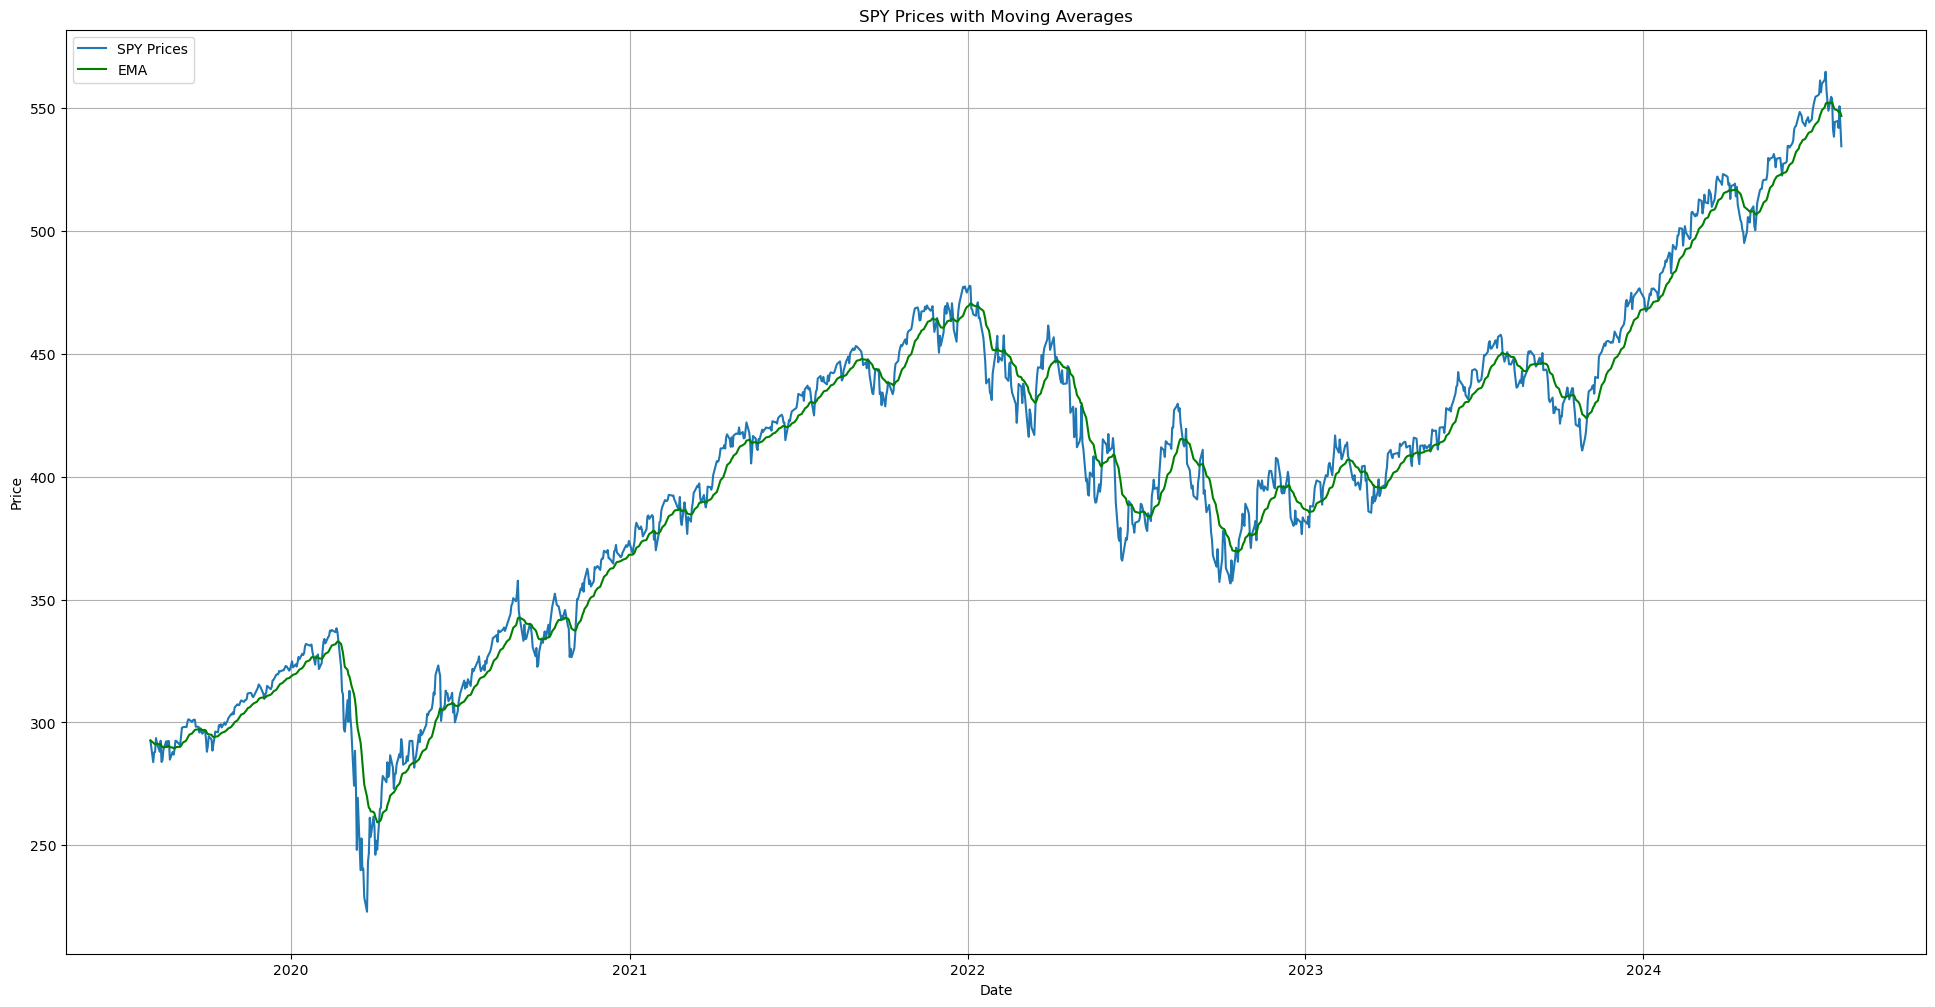

In [3]:
# Exponential Moving Average (EMA)
span = 20
ema = prices.ewm(span=span, adjust=False).mean()

plot_moving_averages(prices, None, ema, None, ticker)


### Weighted Moving Average (WMA)
The Weighted Moving Average (WMA) is a type of moving average that assigns different weights to each data point in the period, giving more importance to certain points, typically the more recent ones. Unlike the Simple Moving Average (SMA), which gives equal weight to all data points, the WMA emphasizes the most recent prices more heavily, making it more responsive to new information.

The formula for calculating the WMA is:

WMA = frac{\sum_{i=1}^{n} (w_i \cdot P_i)}{{i=1}^{n} w_i}

where:
- P_i represents the price at period i
- w_i  represents the weight assigned to period i 
- n is the number of periods considered

In a typical WMA, the weights decrease linearly, so the most recent price is multiplied by \( n \), the second most recent by \( n-1 \), and so on, down to 1 for the oldest price. For example, if using a 5-period WMA, the weights would be 5, 4, 3, 2, and 1.

This method provides a more accurate reflection of recent price trends compared to the SMA, making it useful for short-term trading strategies.

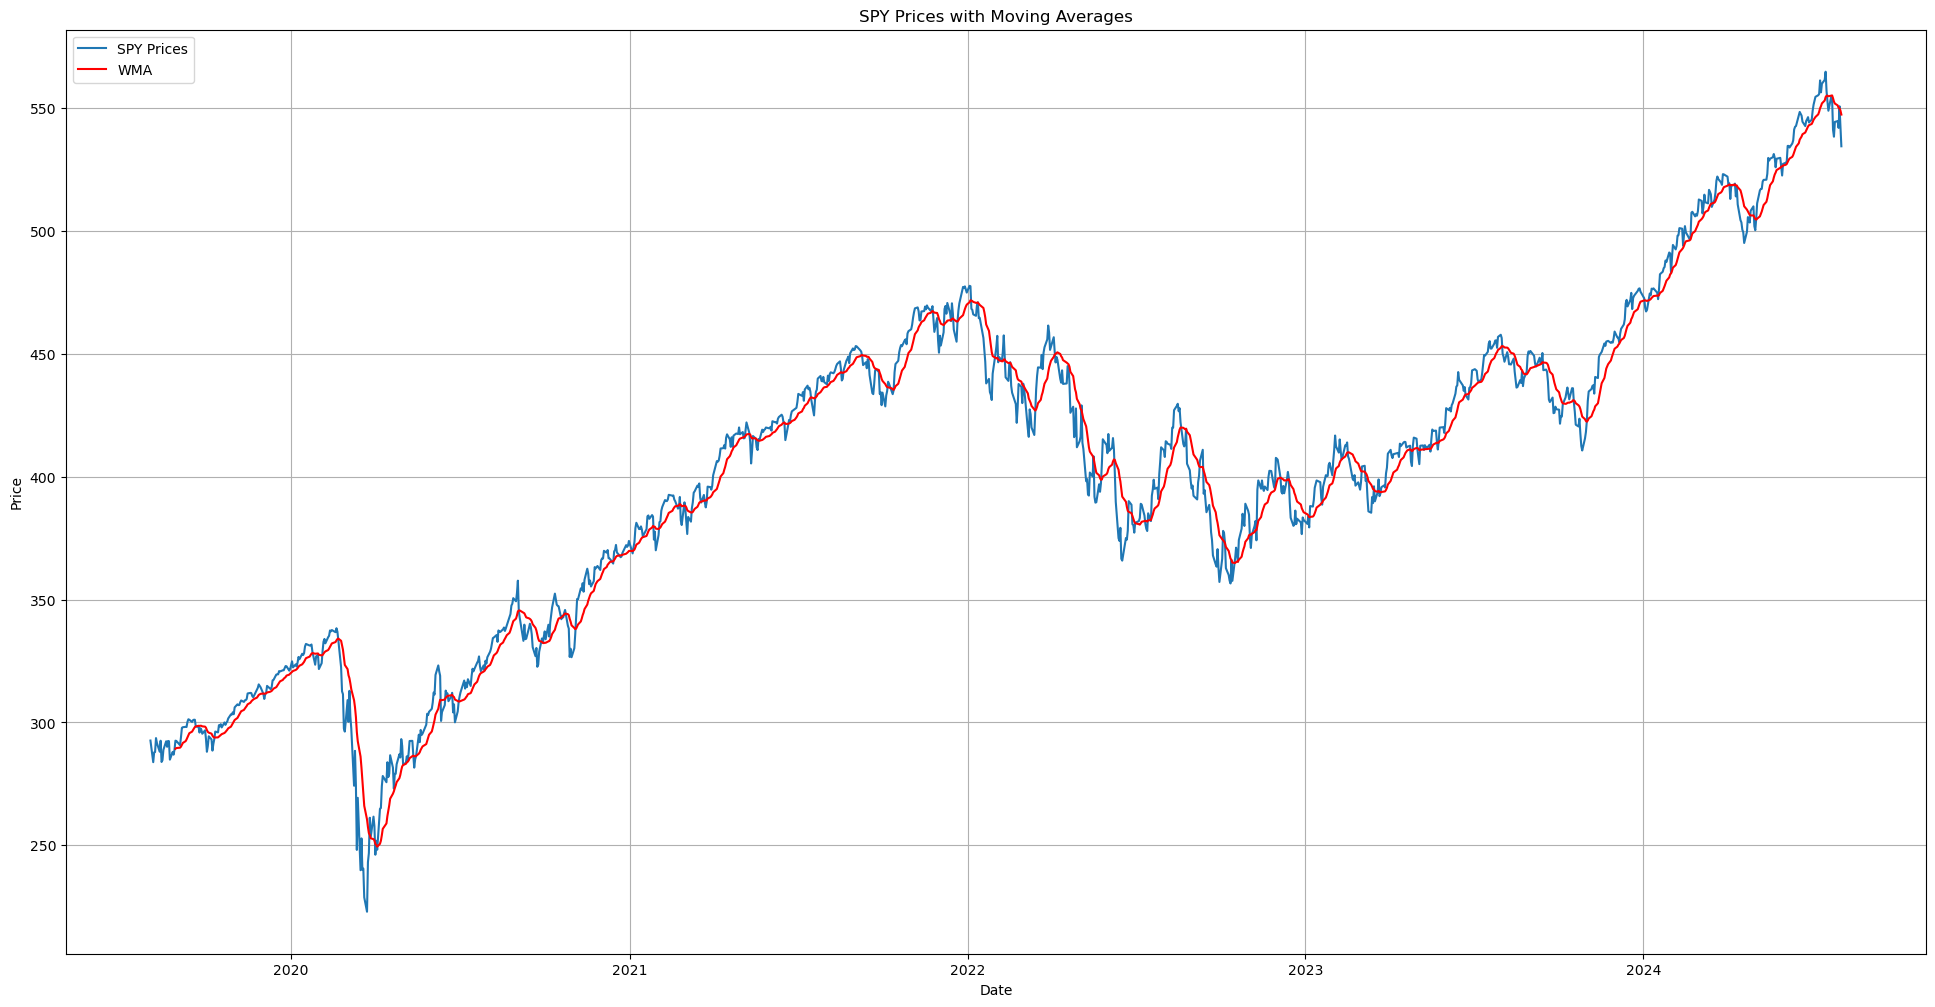

In [4]:
# Weighted Moving Average (WMA)
def weighted_moving_average(data, window):
    weights = np.arange(1, window + 1)
    wma = data.rolling(window).apply(lambda prices: np.dot(prices, weights) / weights.sum(), raw=True)
    return wma

wma = weighted_moving_average(prices, window_size)

plot_moving_averages(prices, None, None, wma, ticker)


## Applications in Financial Markets

- **Trend Identification**
Moving averages help in identifying the direction of a trend. For example, if the stock price is above its moving average, it is generally considered to be in an uptrend.

- **Support and Resistance**
Moving averages can act as support during uptrends and resistance during downtrends. Traders often use moving averages to identify potential buy or sell points.

- **Moving Average Crossovers**
A common trading strategy is to use moving average crossovers. For example, a bullish signal is generated when a short-term moving average crosses above a long-term moving average (Golden Cross), and a bearish signal is generated when it crosses below (Death Cross).


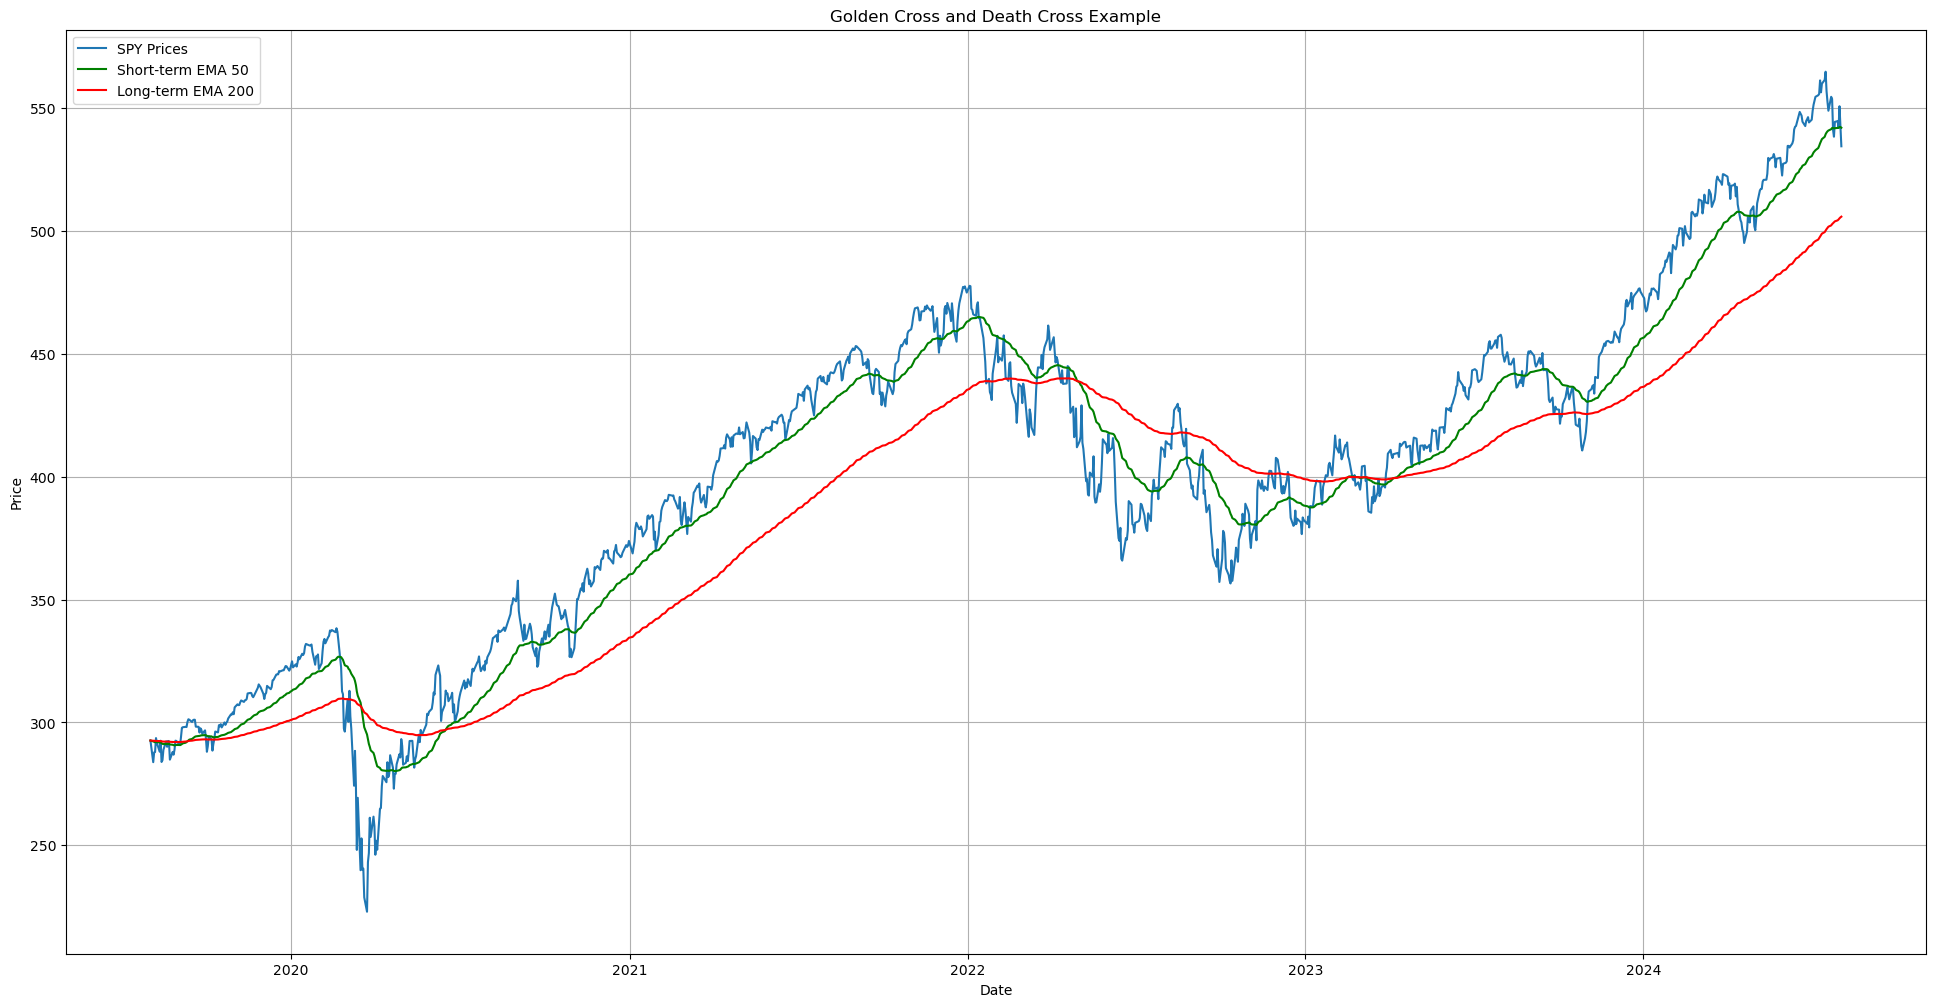

In [5]:
# Calculate short-term and long-term EMAs
short_term_span = 50
long_term_span = 200
short_term_ema = prices.ewm(span=short_term_span, adjust=False).mean()
long_term_ema = prices.ewm(span=long_term_span, adjust=False).mean()

# Plotting with signals
plt.figure(figsize=(24,12))
plt.plot(prices.index, prices, label='SPY Prices', alpha=1)
plt.plot(short_term_ema.index, short_term_ema, label=f'Short-term EMA {short_term_span}', color='green')
plt.plot(long_term_ema.index, long_term_ema, label=f'Long-term EMA {long_term_span}', color='red')
plt.title('Golden Cross and Death Cross Example')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

### Backtesting

[*********************100%%**********************]  1 of 1 completed


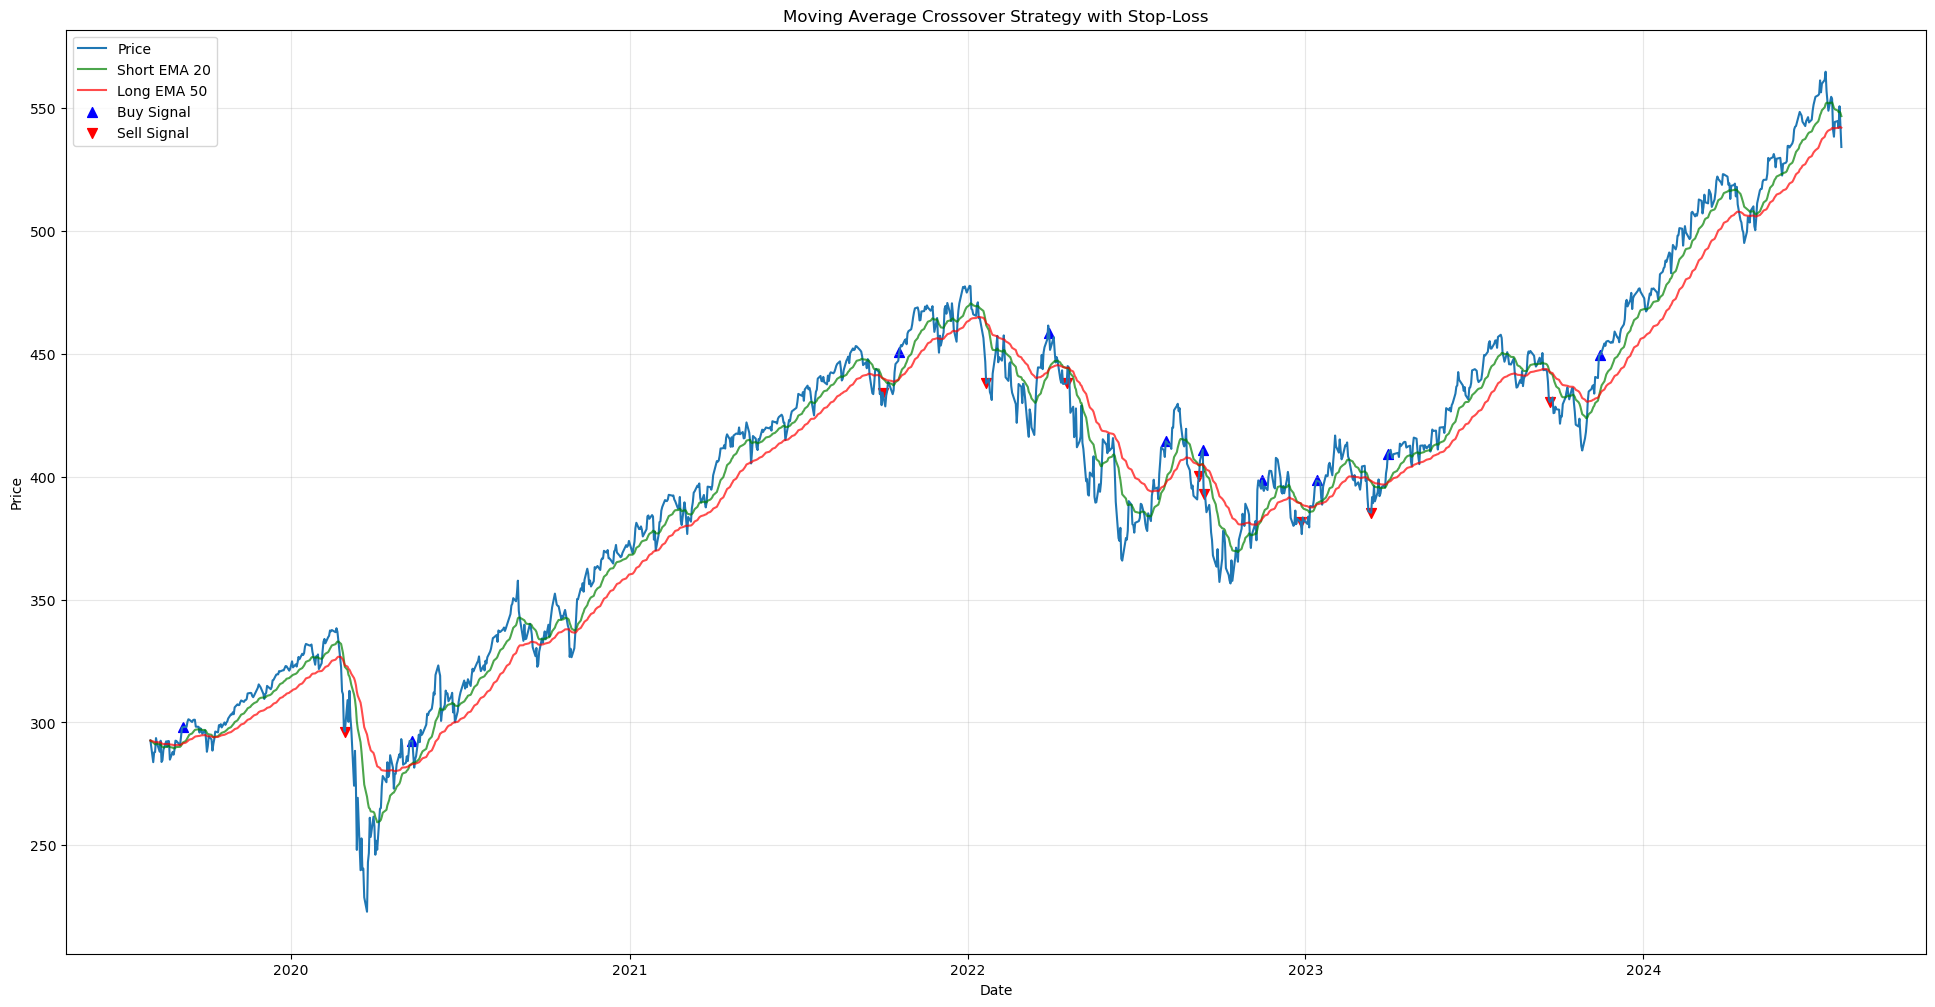

In [9]:
def backtest_moving_average_crossover(prices, short_window, long_window, stop_loss_percent=5):
    signals = pd.DataFrame(index=prices.index)
    signals['price'] = prices
    signals['short_ema'] = prices.ewm(span=short_window, adjust=False).mean()
    signals['long_ema'] = prices.ewm(span=long_window, adjust=False).mean()
    
    # Generate trading signals (1 = buy, 0 = hold, -1 = sell)
    signals['signal'] = 0.0
    signals.iloc[short_window:, signals.columns.get_loc('signal')] = np.where(
        signals['short_ema'].iloc[short_window:] > signals['long_ema'].iloc[short_window:], 1.0, 0.0)
    signals['positions'] = signals['signal'].diff()

    # Initiate positions according to signals and apply stop-loss
    signals['holdings'] = signals['signal']
    stop_loss = None

    for i in range(1, len(signals)):
        if signals['positions'].iloc[i] == 1.0:
            stop_loss = signals['price'].iloc[i] * (1 - stop_loss_percent / 100)
        elif signals['positions'].iloc[i] == -1.0 or (stop_loss is not None and signals['price'].iloc[i] < stop_loss):
            signals['holdings'].iloc[i] = 0
            stop_loss = None
        else:
            signals['holdings'].iloc[i] = signals['holdings'].iloc[i-1]

    # Calculate returns as the percentage change in price
    signals['returns'] = signals['price'].pct_change()
    
    # Calculate the strategy's returns
    signals['strategy_returns'] = signals['returns'] * signals['holdings'].shift(1)

    # Calculate cumulative returns
    signals['cumulative_returns'] = (1 + signals['strategy_returns']).cumprod()

    return signals

# Example backtest with real data
prices = fetch_data(ticker, period='5y')

short_window = 20
long_window = 50
signals = backtest_moving_average_crossover(prices, short_window, long_window, stop_loss_percent=10)

# Plotting the strategy
plt.figure(figsize=(24, 12))
plt.plot(signals.index, signals['price'], label='Price', alpha=1)
plt.plot(signals.index, signals['short_ema'], label=f'Short EMA {short_window}', color='green', alpha=0.7)
plt.plot(signals.index, signals['long_ema'], label=f'Long EMA {long_window}', color='red', alpha=0.7)
plt.scatter(signals[signals['positions'] == 1.0].index, 
            signals['price'][signals['positions'] == 1.0], 
            marker='^', color='blue', s=50, label='Buy Signal', alpha=1)
plt.scatter(signals[signals['positions'] == -1.0].index, 
            signals['price'][signals['positions'] == -1.0], 
            marker='v', color='red', s=50, label='Sell Signal', alpha=1)
plt.title('Moving Average Crossover Strategy with Stop-Loss')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### Performance Metrics

In [10]:
# Calculate performance metrics
def calculate_performance_metrics(signals):
    total_return = signals['cumulative_returns'].iloc[-1] - 1
    annualized_return = signals['strategy_returns'].mean() * 252
    annualized_volatility = signals['strategy_returns'].std() * np.sqrt(252)
    sharpe_ratio = annualized_return / annualized_volatility if annualized_volatility != 0 else np.nan
    
    metrics = {
        'Total Return': total_return,
        'Annualized Return': annualized_return,
        'Annualized Volatility': annualized_volatility,
        'Sharpe Ratio': sharpe_ratio
    }
    
    return metrics

# Calculate and display metrics
metrics = calculate_performance_metrics(signals)
metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=['Value'])

# Displaying performance metrics in a user-friendly format
def display_metrics(metrics_df):
    print("Performance Metrics:")
    display(metrics_df.style.format("{:.2%}").set_caption("Strategy Performance Metrics"))

display_metrics(metrics_df)

Performance Metrics:


,Value
Total Return,46.28%
Annualized Return,8.43%
Annualized Volatility,12.66%
Sharpe Ratio,66.53%


## Conclusion
### Overview
In this notebook, we explored the concept of moving averages and their applications in data filtering, particularly within the context of financial markets. We covered three primary types of moving averages: Simple Moving Average (SMA), Exponential Moving Average (EMA), and Weighted Moving Average (WMA). Each moving average type was examined in detail, including its calculation method, application, and visualization. We also implemented a moving average crossover strategy for backtesting and evaluated its performance using key metrics.
### Key Takeaways
1. **Simple Moving Average (SMA)**
- The SMA is the most straightforward type of moving average, calculated by averaging the prices over a specific number of periods.
- It is useful for identifying long-term trends but can lag behind the actual price movements due to its equal weighting of all periods.
2. **Exponential Moving Average (EMA)**
- The EMA assigns more weight to recent prices, making it more responsive to new information compared to the SMA.
- It is particularly useful for identifying short-term trends and providing timely signals for trading decisions.
3. **Weighted Moving Average (WMA)**
- The WMA assigns linearly decreasing weights to older prices, giving the most weight to recent prices.
- It offers a more accurate reflection of recent price trends compared to the SMA and is useful for short-term trading strategies.
4. **Applications in Financial Markets**
- Moving averages are essential tools for trend identification, support and resistance levels, and moving average crossovers.
- The "Golden Cross" and "Death Cross" are popular crossover strategies used to generate buy and sell signals.
5. **Backtesting and Performance Metrics**
- We implemented a moving average crossover strategy and applied it to historical stock data for backtesting.
- Key performance metrics such as total return, annualized return, annualized volatility, and Sharpe ratio were calculated to evaluate the strategy's effectiveness.
### Performance Analysis
The backtesting results and performance metrics provided insights into the effectiveness of the moving average crossover strategy. The strategy's performance is summarized below:
- Total Return: This metric indicates the overall return generated by the strategy over the backtesting period.
- Annualized Return: This metric represents the average annual return generated by the strategy.
- Annualized Volatility: This metric measures the annualized standard deviation of the strategy's returns, indicating the level of risk.
- Sharpe Ratio: This metric measures the risk-adjusted return of the strategy, with higher values indicating better performance.
These metrics help in assessing the viability of the strategy in different market conditions and provide a benchmark for comparison with other strategies.
### Future Work
While this notebook provides a comprehensive overview of moving averages and their applications, there are several areas for further exploration:
- Incorporating Additional Indicators:
Combining moving averages with other technical indicators, such as the Relative Strength Index (RSI) or Bollinger Bands, to enhance trading strategies.
- Advanced Backtesting Techniques:
Implementing more sophisticated backtesting frameworks that account for transaction costs, slippage, and other real-world factors.
-  Machine Learning Integration:
Exploring the integration of machine learning algorithms to predict price movements and optimize moving average parameters dynamically.
- Real-time Data Analysis:
Extending the notebook to handle real-time data analysis and live trading scenarios.
### Final Thoughts
Moving averages are fundamental tools in financial analysis, offering valuable insights into market trends and helping traders make informed decisions. By understanding and applying different types of moving averages, we can improve our ability to filter noise from data and identify meaningful patterns. This notebook serves as a practical guide for both beginners and experienced practitioners, providing the necessary tools and techniques to leverage moving averages effectively in financial markets.